In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
#TODO 独立完成整份代码

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)


/tmp/ipykernel_36312/340953748.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


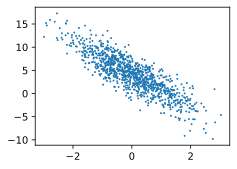

In [3]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)


In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
#数据片

##### yield返回生成器<p>
##### tensorA.index_select(0,tensorB)含义：A在按行索引("0")下选取B那样的行<p>
```
a = torch.linspace(1, 12, steps=12).view(3, 4)
print(a)
b = torch.index_select(a, 0, torch.tensor([0, 2]))
print(b)
print(a.index_select(0, torch.tensor([0, 2])))
c = torch.index_select(a, 1, torch.tensor([1, 3]))
print(c)
``` 
<p>先定义了一个tensor，这里用到了linspace和view方法。
第一个参数是索引的对象，第二个参数0表示按行索引，1表示按列进行索引，第三个参数是一个tensor，就是索引的序号，比如b里面tensor[0， 2]表示第0行和第2行，c里面tensor[1, 3]表示第1列和第3列。

输出结果如下：<p>
```
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[ 1.,  2.,  3.,  4.],
        [ 9., 10., 11., 12.]])
tensor([[ 1.,  2.,  3.,  4.],
        [ 9., 10., 11., 12.]])
tensor([[ 2.,  4.],
        [ 6.,  8.],
        [10., 12.]]) 
```

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,"\n",y)
    break


tensor([[ 0.5850,  0.6498],
        [-0.0341,  0.7319],
        [ 1.5892, -1.0361],
        [-2.3861, -1.3328],
        [-0.3311, -0.4819],
        [-1.8871, -0.8675],
        [ 0.5256,  0.1921],
        [ 0.0555, -0.0401],
        [ 0.9636,  1.7972],
        [ 0.3209, -1.1238]]) 
 tensor([ 3.1621,  1.6281, 10.8944,  3.9676,  5.1635,  3.3871,  4.5906,  4.4408,
         0.0206,  8.6692])


##### 初始化数据
np.random.normal(E,S,< shape >):正态随机数，期望E ,标准差 S,向量shape为shape

In [6]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32,requires_grad=True)
b = torch.zeros(1, dtype=torch.float32,requires_grad=True)

torch.mm(Matrix,Matrix):矩阵乘法<p>
+b:broadcast机制

In [7]:
def linreg(X, w, b):  
    return torch.mm(X, w) + b


In [8]:
def squared_loss(y_hat, y): 
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2


In [9]:
def sgd(params, lr, batch_size):  
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data!!


In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.zero_()
        b.grad.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))
#TODO loss可视化

#TODO end

epoch 1, loss 0.035025
epoch 2, loss 0.000126
epoch 3, loss 0.000050


In [11]:
print(true_w, '\n', w)
print(true_b, '\n', b)
#TODO 数据可视化

#TODO end

[2, -3.4] 
 tensor([[ 1.9994],
        [-3.4003]], requires_grad=True)
4.2 
 tensor([4.1994], requires_grad=True)
